In [1]:
import json
import pandas as pd

json_path = '/Users/matetoth/TDK_kodok/FEOR_with_automation_possibilities.json'

# Read the entire file into a list of dictionaries
with open(json_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Flatten the nested structures in the JSON data
flattened_data = []

for entry in data:
    flattened_entry = {}
    for key, value in entry.items():
        if isinstance(value, dict):
            # Flatten nested dictionaries
            for sub_key, sub_value in value.items():
                flattened_entry[f"{key}_{sub_key}"] = sub_value
        else:
            # Keep other values as they are
            flattened_entry[key] = value
    flattened_data.append(flattened_entry)

# Convert the flattened data to a DataFrame
feor_df = pd.DataFrame(flattened_data)

# Display the first few rows of the DataFrame
feor_df.head()

,1_digit_FEOR_group_code,1_digit_FEOR_group_title,2_digit_FEOR_group_code,2_digit_FEOR_group_title,3_digit_FEOR_group_code,3_digit_FEOR_group_title,4_digit_FEOR_group_code,4_digit_FEOR_group_title,description,tasks,roles,related_feor_codes,task_share,Automation_possibility_1,Automation_possibility_2,Automation_possibility_3,Automation_possibility_4,Automation_possibility_5,Automation_possibility_6
0,1,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",11,"Törvényhozók, igazgatási és érdek-képviseleti ...",111,"Törvényhozók, miniszterek, államtitkárok",1110,"Törvényhozó, miniszter, államtitkár",Az Alkotmány értelmében jogszabályokat alkotna...,törvényhozók esetében a hatáskörüket meghatáro...,"[Alkotmánybíró, Alkotmánybíróság elnöke, Állam...","[1121 Országos és területi közigazgatás, igazs...",0.20;0.20;0.20;0.20;0.20,5;10;5;5;15,0;0;0;0;0,5;10;5;5;10,0;0;0;0;0,5;10;5;5;10,5;10;5;5;15
1,1,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",11,"Törvényhozók, igazgatási és érdek-képviseleti ...",112,"Országos és területi közigazgatás, igazságszol...",1121,"Országos és területi közigazgatás, igazságszol...","Tervezi, vezeti, koordinálja és ellenőrzi a kö...",a központi és területi szervek (minisztériumok...,"[Adó- és Pénzügyi Ellenőrzési Hivatal elnöke, ...","[1110 Törvényhozó, miniszter, államtitkár, 112...",0.10;0.10;0.09;0.09;0.09;0.09;0.09;0.09;0.09;0...,0;10;40;30;20;10;5;15;5;20;30,20;40;70;60;50;30;20;40;30;50;60,0;10;40;30;20;10;5;15;10;20;30,10;30;40;40;30;20;10;30;20;40;50,0;10;40;30;20;10;5;15;10;20;30,10;30;40;40;30;20;10;20;10;20;40
2,1,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",11,"Törvényhozók, igazgatási és érdek-képviseleti ...",112,"Országos és területi közigazgatás, igazságszol...",1122,Helyi önkormányzat választott vezetője,A képviselőtestület vagy a választópolgárok ál...,a hatáskörüket meghatározó keretek között hely...,"[Alpolgármester, Főpolgármester, Kisebbségi ön...","[1110 Törvényhozó, miniszter, államtitkár, 112...",0.10;0.15;0.10;0.10;0.10;0.10;0.10;0.05;0.10;0.10,0;10;5;15;10;5;20;0;5;0,0;10;0;10;10;5;10;0;5;0,0;10;0;10;10;5;10;0;5;0,0;10;0;10;10;5;10;0;5;0,0;10;0;10;10;5;10;0;5;0,0;10;0;10;10;5;10;0;5;0
3,1,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",11,"Törvényhozók, igazgatási és érdek-képviseleti ...",112,"Országos és területi közigazgatás, igazságszol...",1123,Helyi önkormányzat kinevezett vezetője,A képviselőtestület (közgyűlés) által kineveze...,a képviselőtestület felhatalmazása alapján a p...,"[Aljegyző, Főjegyző, Gyámhivatal vezetője, Jeg...","[1110 Törvényhozó, miniszter, államtitkár, 112...",0.08;0.08;0.1;0.07;0.07;0.08;0.07;0.08;0.07;0....,20;15;10;25;5;20;15;10;20;20;30;40;5,20;30;15;40;5;25;30;20;35;25;30;10;5,10;10;20;30;5;10;20;10;20;20;30;10;5,20;30;15;40;5;25;10;20;30;25;30;10;5,20;15;10;25;5;20;10;15;20;20;30;10;5,20;15;10;30;5;25;20;15;20;25;30;20;5
4,1,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",11,"Törvényhozók, igazgatási és érdek-képviseleti ...",113,Országos és területi társadalmi (érdek-képvise...,1131,Társadalmi (érdek-képviseleti) és egyéb szerve...,Meghatározza a társadalmi (érdekképviseleti) é...,"a szervezet politikájának, irányelveinek, szab...","[Ágazati szakszervezet megyei vezetője, Alapít...","[1110 Törvényhozó, miniszter, államtitkár, 112...",0.30;0.40;0.30,10;20;5,10;20;5,5;15;10,10;20;5,20;40;10,20;40;10


In [3]:
import pandas as pd

# Assuming feor_df is your existing DataFrame
# And assuming the tasks column is named 'tasks' and contains tasks separated by ';'
# The automation possibility columns are named 'Automation_possibility_1' to 'Automation_possibility_6'

# Create a list to hold the data for the new DataFrame
new_data = []

# Iterate over the original DataFrame
for index, row in feor_df.iterrows():
    tasks = row['tasks'].split(';')  # Split tasks into a list
    for i, task in enumerate(tasks):
        # For each task, create a row with the task and its automation possibilities
        new_row = {
            '4_digit_FEOR_code': row['4_digit_FEOR_group_code'],
            'task': task,
            # Extract the corresponding automation possibility for this task
            'task_share': row['task_share'].split(';')[i] if row['task_share'] else None,
            'Automation_possibility_1': row['Automation_possibility_1'].split(';')[i] if row['Automation_possibility_1'] else None,
            'Automation_possibility_2': row['Automation_possibility_2'].split(';')[i] if row['Automation_possibility_2'] else None,
            'Automation_possibility_3': row['Automation_possibility_3'].split(';')[i] if row['Automation_possibility_3'] else None,
            'Automation_possibility_4': row['Automation_possibility_4'].split(';')[i] if row['Automation_possibility_4'] else None,
            'Automation_possibility_5': row['Automation_possibility_5'].split(';')[i] if row['Automation_possibility_5'] else None,
            'Automation_possibility_6': row['Automation_possibility_6'].split(';')[i] if row['Automation_possibility_6'] else None,
        }
        new_data.append(new_row)

# Create a new DataFrame from the list
tasks_df = pd.DataFrame(new_data)

# Now, tasks_df is the DataFrame where each row is a task with its corresponding automation possibilities
tasks_df.head()

,4_digit_FEOR_code,task,task_share,Automation_possibility_1,Automation_possibility_2,Automation_possibility_3,Automation_possibility_4,Automation_possibility_5,Automation_possibility_6
0,1110,törvényhozók esetében a hatáskörüket meghatáro...,0.20,5,0,5,0,5,5
1,1110,az ország és az adott terület társadalmi-gazd...,0.20,10,0,10,0,10,10
2,1110,"az általuk képviselt választók, illetve az ál...",0.20,5,0,5,0,5,5
3,1110,"az Országgyűlés munkájában, ülésein való rész...",0.20,5,0,5,0,5,5
4,1110,"minisztériumok, illetve hatáskörükbe rendelt ...",0.20,15,0,10,0,10,15


In [4]:
# Check for missing values
print(tasks_df.isnull().sum())

4_digit_FEOR_code           0
task                        0
task_share                  0
Automation_possibility_1    0
Automation_possibility_2    0
Automation_possibility_3    0
Automation_possibility_4    0
Automation_possibility_5    0
Automation_possibility_6    0
dtype: int64


In [5]:
# Check data types of the DataFrame
print(tasks_df.dtypes)

4_digit_FEOR_code           object
task                        object
task_share                  object
Automation_possibility_1    object
Automation_possibility_2    object
Automation_possibility_3    object
Automation_possibility_4    object
Automation_possibility_5    object
Automation_possibility_6    object
dtype: object


In [6]:
# List of columns to convert
columns_to_convert = [
    'task_share',
    'Automation_possibility_1',
    'Automation_possibility_2',
    'Automation_possibility_3',
    'Automation_possibility_4',
    'Automation_possibility_5',
    'Automation_possibility_6'
]

# Convert each column to numeric, coercing errors to NaN
for column in columns_to_convert:
    tasks_df[column] = pd.to_numeric(tasks_df[column], errors='coerce')

# Now you can calculate the average and standard deviation as shown previously
tasks_df['Automation_possibility_avg'] = tasks_df[columns_to_convert].mean(axis=1)
tasks_df['Automation_possibility_stdev'] = tasks_df[columns_to_convert].std(axis=1)

# Display the updated DataFrame to verify the new columns and data types
print(tasks_df.head())
print(tasks_df.dtypes)

  4_digit_FEOR_code                                               task  \
0              1110  törvényhozók esetében a hatáskörüket meghatáro...   
1              1110   az ország és az adott terület társadalmi-gazd...   
2              1110   az általuk képviselt választók, illetve az ál...   
3              1110   az Országgyűlés munkájában, ülésein való rész...   
4              1110   minisztériumok, illetve hatáskörükbe rendelt ...   

   task_share  Automation_possibility_1  Automation_possibility_2  \
0         0.2                         5                         0   
1         0.2                        10                         0   
2         0.2                         5                         0   
3         0.2                         5                         0   
4         0.2                        15                         0   

   Automation_possibility_3  Automation_possibility_4  \
0                         5                       0.0   
1                        1

In [7]:
# Find the rows where 'Automation_possibility_4' is NaN
nan_rows = tasks_df[tasks_df['Automation_possibility_4'].isna()]

# Display these rows to inspect them
print(nan_rows)

     4_digit_FEOR_code task  task_share  Automation_possibility_1  \
3357              7539              1.0                         0   

      Automation_possibility_2  Automation_possibility_3  \
3357                        30                        25   

      Automation_possibility_4  Automation_possibility_5  \
3357                       NaN                        30   

      Automation_possibility_6  Automation_possibility_avg  \
3357                        30                   19.333333   

      Automation_possibility_stdev  
3357                     14.719601  


In [8]:
# Calculate the average of the other automation possibilities, excluding NaN values
row_index = 3357  # Based on your output, adjust if the index is different
other_cols = ['Automation_possibility_1', 'Automation_possibility_2', 'Automation_possibility_3', 'Automation_possibility_5', 'Automation_possibility_6']
avg_value = tasks_df.loc[row_index, other_cols].mean()

# Replace NaN in Automation_possibility_4 with this average
tasks_df.at[row_index, 'Automation_possibility_4'] = avg_value

In [9]:
tasks_df['Automation_possibility_avg'] = tasks_df[['Automation_possibility_1', 'Automation_possibility_2', 'Automation_possibility_3', 'Automation_possibility_4', 'Automation_possibility_5', 'Automation_possibility_6']].mean(axis=1)
tasks_df['Automation_possibility_stdev'] = tasks_df[['Automation_possibility_1', 'Automation_possibility_2', 'Automation_possibility_3', 'Automation_possibility_4', 'Automation_possibility_5', 'Automation_possibility_6']].std(axis=1)

In [10]:
# Convert Automation_possibility_4 to int
tasks_df['Automation_possibility_4'] = tasks_df['Automation_possibility_4'].astype(int)

In [11]:
# Round to the nearest hundredth
tasks_df['Automation_possibility_avg'] = tasks_df['Automation_possibility_avg'].round(2)
tasks_df['Automation_possibility_stdev'] = tasks_df['Automation_possibility_stdev'].round(2)

In [12]:
# Verify the data types and check the first few rows to see the rounding
print(tasks_df.dtypes)
tasks_df.head()

4_digit_FEOR_code                object
task                             object
task_share                      float64
Automation_possibility_1          int64
Automation_possibility_2          int64
Automation_possibility_3          int64
Automation_possibility_4          int64
Automation_possibility_5          int64
Automation_possibility_6          int64
Automation_possibility_avg      float64
Automation_possibility_stdev    float64
dtype: object


,4_digit_FEOR_code,task,task_share,Automation_possibility_1,Automation_possibility_2,Automation_possibility_3,Automation_possibility_4,Automation_possibility_5,Automation_possibility_6,Automation_possibility_avg,Automation_possibility_stdev
0,1110,törvényhozók esetében a hatáskörüket meghatáro...,0.2,5,0,5,0,5,5,3.33,2.58
1,1110,az ország és az adott terület társadalmi-gazd...,0.2,10,0,10,0,10,10,6.67,5.16
2,1110,"az általuk képviselt választók, illetve az ál...",0.2,5,0,5,0,5,5,3.33,2.58
3,1110,"az Országgyűlés munkájában, ülésein való rész...",0.2,5,0,5,0,5,5,3.33,2.58
4,1110,"minisztériumok, illetve hatáskörükbe rendelt ...",0.2,15,0,10,0,10,15,8.33,6.83


In [ ]:
# Specify the path and file name for your JSON file
json_file_path = '/Users/matetoth/TDK_kodok/tasks_df.json'

# Save the DataFrame to a JSON file, preserving special Hungarian characters
tasks_df.to_json(json_file_path, orient='records', lines=True, force_ascii=False)

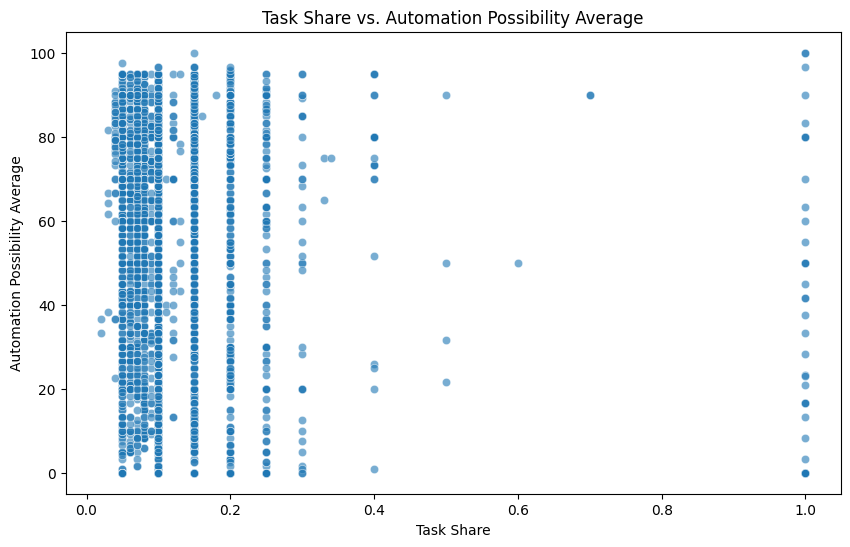

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named tasks_df
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.scatterplot(data=tasks_df, x='task_share', y='Automation_possibility_avg', alpha=0.6)

plt.title('Task Share vs. Automation Possibility Average')  # Add a title to the plot
plt.xlabel('Task Share')  # Label for the x-axis
plt.ylabel('Automation Possibility Average')  # Label for the y-axis
plt.show()  # Display the plot

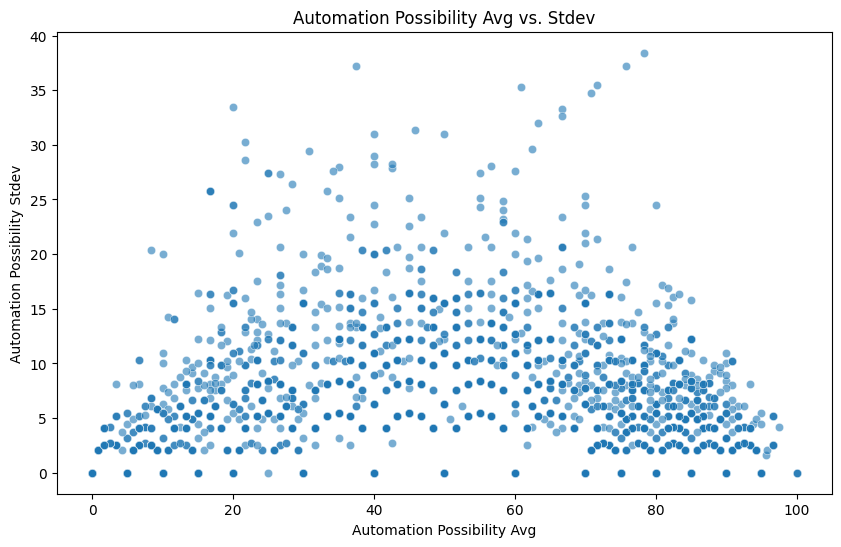

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named tasks_df
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.scatterplot(data=tasks_df, x='Automation_possibility_avg', y='Automation_possibility_stdev', alpha=0.6)

plt.title('Automation Possibility Avg vs. Stdev')  # Add a title to the plot
plt.xlabel('Automation Possibility Avg')  # Label for the x-axis
plt.ylabel('Automation Possibility Stdev')  # Label for the y-axis
plt.show()  # Display the plot



In [15]:
# Specify the path and file name for your JSON file
json_file_path = '/Users/matetoth/TDK_kodok/FEOR_with_automation_possibilities_and_economic_feasibility.json'

import json
import pandas as pd

json_path = json_file_path

# Read the entire file into a list of dictionaries
with open(json_path, 'r') as file:
    data = [json.loads(line) for line in file]

# Flatten the nested structures in the JSON data
flattened_data = []

for entry in data:
    flattened_entry = {}
    for key, value in entry.items():
        if isinstance(value, dict):
            # Flatten nested dictionaries
            for sub_key, sub_value in value.items():
                flattened_entry[f"{key}_{sub_key}"] = sub_value
        else:
            # Keep other values as they are
            flattened_entry[key] = value
    flattened_data.append(flattened_entry)

# Convert the flattened data to a DataFrame
economic_df = pd.DataFrame(flattened_data)

# Display the first few rows of the DataFrame
economic_df.head()

,1_digit_FEOR_group_code,1_digit_FEOR_group_title,2_digit_FEOR_group_code,2_digit_FEOR_group_title,3_digit_FEOR_group_code,3_digit_FEOR_group_title,4_digit_FEOR_group_code,4_digit_FEOR_group_title,description,tasks,...,Automation_possibility_3,Automation_possibility_4,Automation_possibility_5,Automation_possibility_6,Automation_economic_feasibility_1,Automation_economic_feasibility_2,Automation_economic_feasibility_3,Automation_economic_feasibility_4,Automation_economic_feasibility_5,Automation_economic_feasibility_6
0,1,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",11,"Törvényhozók, igazgatási és érdek-képviseleti ...",111,"Törvényhozók, miniszterek, államtitkárok",1110,"Törvényhozó, miniszter, államtitkár",Az Alkotmány értelmében jogszabályokat alkotna...,törvényhozók esetében a hatáskörüket meghatáro...,...,5;10;5;5;10,0;0;0;0;0,5;10;5;5;10,5;10;5;5;15,0;0;0;0;0,0;0;0;0;0,0;0;0;0;0,0;0;0;0;0,0;0;0;0;0,0;0;0;0;0
1,1,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",11,"Törvényhozók, igazgatási és érdek-képviseleti ...",112,"Országos és területi közigazgatás, igazságszol...",1121,"Országos és területi közigazgatás, igazságszol...","Tervezi, vezeti, koordinálja és ellenőrzi a kö...",a központi és területi szervek (minisztériumok...,...,0;10;40;30;20;10;5;15;10;20;30,10;30;40;40;30;20;10;30;20;40;50,0;10;40;30;20;10;5;15;10;20;30,10;30;40;40;30;20;10;20;10;20;40,0;0;20;10;10;0;0;10;0;10;20,0;0;10;10;10;5;0;10;0;10;10,0;0;20;10;10;0;0;10;0;10;20,0;0;10;10;5;0;0;5;0;10;10,0;0;10;10;5;5;0;10;0;10;10,0;0;10;10;5;0;0;10;0;10;10
2,1,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",11,"Törvényhozók, igazgatási és érdek-képviseleti ...",112,"Országos és területi közigazgatás, igazságszol...",1122,Helyi önkormányzat választott vezetője,A képviselőtestület vagy a választópolgárok ál...,a hatáskörüket meghatározó keretek között hely...,...,0;10;0;10;10;5;10;0;5;0,0;10;0;10;10;5;10;0;5;0,0;10;0;10;10;5;10;0;5;0,0;10;0;10;10;5;10;0;5;0,0;0;0;0;0;0;0;0;0;0,0;0;0;0;0;0;0;0;0;0,0;0;0;0;0;0;0;0;0;0,0;0;0;0;0;0;0;0;0;0,0;0;0;0;0;0;0;0;0;0,0;0;0;0;0;0;0;0;0;0
3,1,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",11,"Törvényhozók, igazgatási és érdek-képviseleti ...",112,"Országos és területi közigazgatás, igazságszol...",1123,Helyi önkormányzat kinevezett vezetője,A képviselőtestület (közgyűlés) által kineveze...,a képviselőtestület felhatalmazása alapján a p...,...,10;10;20;30;5;10;20;10;20;20;30;10;5,20;30;15;40;5;25;10;20;30;25;30;10;5,20;15;10;25;5;20;10;15;20;20;30;10;5,20;15;10;30;5;25;20;15;20;25;30;20;5,0;0;10;20;0;5;0;10;10;10;10;10;0,0;0;0;10;0;0;0;10;10;10;10;10;0,0;0;0;10;0;0;0;10;10;10;0;0;0,0;0;0;10;0;0;0;10;10;10;10;0;0,0;0;0;10;0;0;0;0;0;0;0;0;0,0;0;0;10;0;0;0;10;10;10;0;0;0
4,1,"GAZDASÁGI, IGAZGATÁSI, ÉRDEK-KÉPVISELETI VEZET...",11,"Törvényhozók, igazgatási és érdek-képviseleti ...",113,Országos és területi társadalmi (érdek-képvise...,1131,Társadalmi (érdek-képviseleti) és egyéb szerve...,Meghatározza a társadalmi (érdekképviseleti) é...,"a szervezet politikájának, irányelveinek, szab...",...,5;15;10,10;20;5,20;40;10,20;40;10,5;15;5,0;10;5,10;20;5,10;20;5,10;20;5,0;10;5


In [17]:
import pandas as pd

# Create a list to hold the data for the new DataFrame
new_data = []

# Iterate over the original DataFrame
for index, row in economic_df.iterrows():
    tasks = row['tasks'].split(';')  # Split tasks into a list
    for i, task in enumerate(tasks):
        # For each task, create a row with the task and its automation possibilities
        new_row = {
            '4_digit_FEOR_code': row['4_digit_FEOR_group_code'],
            'task': task,
            # Extract the corresponding automation feasibility for this task
            'task_share': row['task_share'].split(';')[i] if row['task_share'] else None,
            'Automation_economic_feasibility_1': row['Automation_economic_feasibility_1'].split(';')[i] if row['Automation_economic_feasibility_1'] else None,
            'Automation_economic_feasibility_2': row['Automation_economic_feasibility_2'].split(';')[i] if row['Automation_economic_feasibility_2'] else None,
            'Automation_economic_feasibility_3': row['Automation_economic_feasibility_3'].split(';')[i] if row['Automation_economic_feasibility_3'] else None,
            'Automation_economic_feasibility_4': row['Automation_economic_feasibility_4'].split(';')[i] if row['Automation_economic_feasibility_4'] else None,
            'Automation_economic_feasibility_5': row['Automation_economic_feasibility_5'].split(';')[i] if row['Automation_economic_feasibility_5'] else None,
            'Automation_economic_feasibility_6': row['Automation_economic_feasibility_6'].split(';')[i] if row['Automation_economic_feasibility_6'] else None
        }
        new_data.append(new_row)

        
# Create a new DataFrame from the list
econ_df = pd.DataFrame(new_data)

# Convert 'Automation_economic_feasibility_1' to numeric, coercing errors to NaN
econ_df['Automation_economic_feasibility_1'] = pd.to_numeric(econ_df['Automation_economic_feasibility_1'], errors='coerce')
econ_df['Automation_economic_feasibility_2'] = pd.to_numeric(econ_df['Automation_economic_feasibility_2'], errors='coerce')
econ_df['Automation_economic_feasibility_3'] = pd.to_numeric(econ_df['Automation_economic_feasibility_3'], errors='coerce')
econ_df['Automation_economic_feasibility_4'] = pd.to_numeric(econ_df['Automation_economic_feasibility_4'], errors='coerce')
econ_df['Automation_economic_feasibility_5'] = pd.to_numeric(econ_df['Automation_economic_feasibility_5'], errors='coerce')
econ_df['Automation_economic_feasibility_6'] = pd.to_numeric(econ_df['Automation_economic_feasibility_6'], errors='coerce')

# Display the updated DataFrame to verify the new columns and data types
econ_df.head()
print(econ_df.dtypes)

4_digit_FEOR_code                     object
task                                  object
task_share                            object
Automation_economic_feasibility_1      int64
Automation_economic_feasibility_2      int64
Automation_economic_feasibility_3      int64
Automation_economic_feasibility_4    float64
Automation_economic_feasibility_5    float64
Automation_economic_feasibility_6      int64
dtype: object


In [18]:
econ_df.head()

,4_digit_FEOR_code,task,task_share,Automation_economic_feasibility_1,Automation_economic_feasibility_2,Automation_economic_feasibility_3,Automation_economic_feasibility_4,Automation_economic_feasibility_5,Automation_economic_feasibility_6
0,1110,törvényhozók esetében a hatáskörüket meghatáro...,0.20,0,0,0,0.0,0.0,0
1,1110,az ország és az adott terület társadalmi-gazd...,0.20,0,0,0,0.0,0.0,0
2,1110,"az általuk képviselt választók, illetve az ál...",0.20,0,0,0,0.0,0.0,0
3,1110,"az Országgyűlés munkájában, ülésein való rész...",0.20,0,0,0,0.0,0.0,0
4,1110,"minisztériumok, illetve hatáskörükbe rendelt ...",0.20,0,0,0,0.0,0.0,0


In [19]:
# Find the rows where 'Automation_possibility_4' is NaN
nan_rows = econ_df[econ_df['Automation_economic_feasibility_4'].isna()]

# Display these rows to inspect them
print(nan_rows)

     4_digit_FEOR_code task task_share  Automation_economic_feasibility_1  \
1486              3190            1.00                                  0   

      Automation_economic_feasibility_2  Automation_economic_feasibility_3  \
1486                                  0                                  0   

      Automation_economic_feasibility_4  Automation_economic_feasibility_5  \
1486                                NaN                                NaN   

      Automation_economic_feasibility_6  
1486                                  0  


In [20]:
# Calculate the average of the other automation possibilities, excluding NaN values
row_index = 1486
other_cols = ['Automation_economic_feasibility_1', 'Automation_economic_feasibility_2', 'Automation_economic_feasibility_3', 'Automation_economic_feasibility_6']
avg_value = econ_df.loc[row_index, other_cols].mean()

# Replace NaN in Automation_economic_feasibility_4 and Automation_economic_feasibility_5 with this average
econ_df.at[row_index, 'Automation_economic_feasibility_4'] = avg_value
econ_df.at[row_index, 'Automation_economic_feasibility_5'] = avg_value

In [21]:
# Convert Automation_economic_feasibility_4 and 'Automation_economic_feasibility_5' to int
econ_df['Automation_economic_feasibility_4'] = econ_df['Automation_economic_feasibility_4'].astype(int)
econ_df['Automation_economic_feasibility_5'] = econ_df['Automation_economic_feasibility_5'].astype(int)

In [23]:
# List of columns to convert
columns = [
    'Automation_economic_feasibility_1',
    'Automation_economic_feasibility_2',
    'Automation_economic_feasibility_3',
    'Automation_economic_feasibility_4',
    'Automation_economic_feasibility_5',
    'Automation_economic_feasibility_6'
]

# Convert each column to numeric, coercing errors to NaN
for column in columns:
    econ_df[column] = pd.to_numeric(econ_df[column], errors='coerce')

# Now you can calculate the average and standard deviation as shown previously
econ_df['Automation_economic_feasibility_avg'] = econ_df[columns].mean(axis=1)
econ_df['Automation_economic_feasibility_stdev'] = econ_df[columns].std(axis=1)

# Round to the nearest hundredth
econ_df['Automation_economic_feasibility_avg'] = econ_df['Automation_economic_feasibility_avg'].round(2)
econ_df['Automation_economic_feasibility_stdev'] = econ_df['Automation_economic_feasibility_stdev'].round(2)

# Display the updated DataFrame to verify the new columns and data types
print(econ_df.dtypes)
econ_df.head()

4_digit_FEOR_code                         object
task                                      object
task_share                               float64
Automation_economic_feasibility_1          int64
Automation_economic_feasibility_2          int64
Automation_economic_feasibility_3          int64
Automation_economic_feasibility_4          int64
Automation_economic_feasibility_5          int64
Automation_economic_feasibility_6          int64
Automation_economic_feasibility_avg      float64
Automation_economic_feasibility_stdev    float64
dtype: object


,4_digit_FEOR_code,task,task_share,Automation_economic_feasibility_1,Automation_economic_feasibility_2,Automation_economic_feasibility_3,Automation_economic_feasibility_4,Automation_economic_feasibility_5,Automation_economic_feasibility_6,Automation_economic_feasibility_avg,Automation_economic_feasibility_stdev
0,1110,törvényhozók esetében a hatáskörüket meghatáro...,0.2,0,0,0,0,0,0,0.0,0.0
1,1110,az ország és az adott terület társadalmi-gazd...,0.2,0,0,0,0,0,0,0.0,0.0
2,1110,"az általuk képviselt választók, illetve az ál...",0.2,0,0,0,0,0,0,0.0,0.0
3,1110,"az Országgyűlés munkájában, ülésein való rész...",0.2,0,0,0,0,0,0,0.0,0.0
4,1110,"minisztériumok, illetve hatáskörükbe rendelt ...",0.2,0,0,0,0,0,0,0.0,0.0


In [24]:
# Find the rows where 'Automation_possibility_4' is NaN
nan_rows = tasks_df[tasks_df['Automation_possibility_avg'].isna()]

# Display these rows to inspect them
print(nan_rows)

Empty DataFrame
Columns: [4_digit_FEOR_code, task, task_share, Automation_possibility_1, Automation_possibility_2, Automation_possibility_3, Automation_possibility_4, Automation_possibility_5, Automation_possibility_6, Automation_possibility_avg, Automation_possibility_stdev]
Index: []


In [ ]:
# Specify the path and file name for your JSON file
json_file_path = '/Users/matetoth/TDK_kodok/econ_df.json'

# Save the DataFrame to a JSON file, preserving special Hungarian characters
econ_df.to_json(json_file_path, orient='records', lines=True, force_ascii=False)